### Assesment 1: Topic Analysis of Review - Submitted by Byju Nambidiyattil Govindan
#PROJECT DESCRIPTION

#Help a leading mobile brand understand the voice of the customer by analyzing the reviews of their product on Amazon and the topics that customers are talking about. 
#You will perform topic modeling on specific parts of speech. You’ll finally interpret the emerging topics.

#Problem Statement: 

#A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. 
#The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, 
#but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that 
#customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

#Domain: Amazon reviews for a leading phone brand

#Analysis to be done: POS tagging, topic modeling using LDA, and topic interpretation

#Content: 

#Dataset: ‘K8 Reviews v0.2.csv’

#Columns:

#Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)

#Reviews: The main text of the review

#Steps to perform:

#Discover the topics in the reviews and present it to business in a consumable format. 
#Employ techniques in syntactic processing and topic modeling.

#Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. 
#Finally, give business-friendly names to the topics and make a table for business.

#Tasks: 

#Read the .csv file using Pandas. Take a look at the top few records.

#Normalize casings for the review text and extract the text into a list for easier manipulation.

#Tokenize the reviews using NLTKs word_tokenize function.

#Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

#For the topic model, we should  want to include only nouns.

#Find out all the POS tags that correspond to nouns.

#Limit the data to only terms with these tags.

#Lemmatize. 

#Different forms of the terms need to be treated as one.

#No need to provide POS tag to lemmatizer for now.

#Remove stopwords and punctuation (if there are any). 

#Create a topic model using LDA on the cleaned up data with 12 topics.

#Print out the top terms for each topic.

#What is the coherence of the model with the c_v metric?

#Analyze the topics through the business lens.

#Determine which of the topics can be combined.

#Create topic model using LDA with what you think is the optimal number of topics

#What is the coherence of the model?

#The business should  be able to interpret the topics.

#Name each of the identified topics.

#Create a table with the topic name and the top 10 terms in each to present to the  business.

# Import the operating System and Set the working directory

In [2]:
# Import the operating system. The OS module in Python provides functions for creating and removing a directory (folder),
# fetching its contents, changing and identifying the current directory, etc.

import os

In [3]:
#Get the current working directory
os.getcwd()

#Change the directory settings as needed
#os.chdir("/home/labsuser/Byju")
os.chdir("C:\\Users\\Byju\\Dropbox\\1. BNGPersonal\\Purdue-SimpliLearn\\3. AI & ML\\AssesmentProjects")

In [4]:
#lets create a course specific subdirectory under the student directory "Byju" to save project data and ipynb files
if not os.path.exists('C:\\Users\\Byju\\Dropbox\\1. BNGPersonal\\Purdue-SimpliLearn\\3. AI & ML\\AssesmentProjects\\Course5-PG-AIML-NLP&SR'):
    #os.makedirs('/home/labsuser/Byju/Course5-PG-AIML-NLP&SR')
    os.mkdir("C:\\Users\\Byju\\Dropbox\\1. BNGPersonal\\Purdue-SimpliLearn\\3. AI & ML\\AssesmentProjects\\Course5-PG-AIML-NLP&SR")

In [5]:
#Lets set directory "Byju" as working diectory
os.chdir("..")

#Let's explicitly reset the directory "Course3-PG-AI-DSP" as the desired working directory 
os.chdir('C:\\Users\\Byju\\Dropbox\\1. BNGPersonal\\Purdue-SimpliLearn\\3. AI & ML\\AssesmentProjects\\Course5-PG-AIML-NLP&SR')

#display the current working directory for confirmation
os.getcwd()

'C:\\Users\\Byju\\Dropbox\\1. BNGPersonal\\Purdue-SimpliLearn\\3. AI & ML\\AssesmentProjects\\Course5-PG-AIML-NLP&SR'

In [6]:
# Import relevant libraries'


# Import Pandas (Python-based data analysis toolkit ) open source Python library to access Pandas and its functions

import pandas as pd


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [7]:
os.getcwd()

'C:\\Users\\Byju\\Dropbox\\1. BNGPersonal\\Purdue-SimpliLearn\\3. AI & ML\\AssesmentProjects\\Course5-PG-AIML-NLP&SR'

### Task 1: Read the .csv file using Pandas. Take a look at the top few records.

In [8]:
review_data = pd.read_csv('C:\\Users\\Byju\\Dropbox\\1. BNGPersonal\\Purdue-SimpliLearn\\3. AI & ML\\AssesmentProjects\\Module5\\K8 Reviews v0.2.csv')
review_data.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [9]:
print(review_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB
None


In [10]:
review_data = review_data.drop('sentiment',axis=1)

In [11]:
#Dimension of clipped data : We have 14675 rows and 1 column after removing the sentiment column
review_data.shape

(14675, 1)

In [12]:
# Check to replace/drop NULL values: There are no null values in the dataset
review_data.isnull().sum()

review    0
dtype: int64

## Data Pre-processing

### Task 2: Normalize casings for the review text and extract the text into a list for easier manipulation.

In [13]:
review_data['clean_review'] = review_data['review'].apply(lambda x: str(x).lower())
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr..."
2,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


In [14]:
review_data_records = review_data.clean_review.values.tolist()

# or
#review_data_records = review_data.clean_review.values
#review_data_records = list(review_data_records)

review_data_records

['good but need updates and improvements',
 "worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 'when i will get my 10% cash back.... its already 15 january..',
 'good',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 note',
 'the battery level has worn down',
 "it'

In [15]:
type(review_data_records)

list

### Task 3: Tokenize the reviews using NLTKs word_tokenize function.

In [16]:
#Tokenize the words
import nltk

# download required nltk packages
# required for tokenization
nltk.download('punkt')
# required for parts of speech tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Byju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Byju\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
review_word_tokens = [nltk.word_tokenize(records) for records in review_data_records]
print(review_word_tokens)

[['good', 'but', 'need', 'updates', 'and', 'improvements'], ['worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', ',', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged.this', 'is', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'is', 'not', 'at', 'all', 'expected', ',', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000mah', '&', 'booster', 'charger', 'is', 'fake', ',', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged.do', "n't", 'know', 'how', 'lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us.please', 'don', ';', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me', '.'], ['when', 'i', 'will', 'get', 'my', '10', '%', 'cash', 'back', '....', 'its', 'already', '15', 'january', '..'], ['good'], ['the', 'worst', 'phone', 'everthe

### Task 4: Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

In [18]:
pos_tags = nltk.pos_tag(review_data_records)
#pos_tags
print(len(pos_tags))
print(pos_tags[:10])

14675
[('good but need updates and improvements', 'NNS'), ("worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.", 'WRB'), ('when i will get my 10% cash back.... its already 15 january..', 'NN'), ('good', 'JJ'), ('the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon', 'NN'), ("only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money", 'NN'), ('phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo 

In [19]:
# POS tagging using NLTK pos tagger
pos_tag_revwords = [nltk.pos_tag(review) for review in review_word_tokens]
print(len(pos_tag_revwords))
print(pos_tag_revwords[:10])

14675
[[('good', 'JJ'), ('but', 'CC'), ('need', 'VBP'), ('updates', 'NNS'), ('and', 'CC'), ('improvements', 'NNS')], [('worst', 'JJS'), ('mobile', 'NN'), ('i', 'NN'), ('have', 'VBP'), ('bought', 'VBN'), ('ever', 'RB'), (',', ','), ('battery', 'NN'), ('is', 'VBZ'), ('draining', 'VBG'), ('like', 'IN'), ('hell', 'NN'), (',', ','), ('backup', 'NN'), ('is', 'VBZ'), ('only', 'RB'), ('6', 'CD'), ('to', 'TO'), ('7', 'CD'), ('hours', 'NNS'), ('with', 'IN'), ('internet', 'JJ'), ('uses', 'NNS'), (',', ','), ('even', 'RB'), ('if', 'IN'), ('i', 'JJ'), ('put', 'VBP'), ('mobile', 'JJ'), ('idle', 'NN'), ('its', 'PRP$'), ('getting', 'VBG'), ('discharged.this', 'NN'), ('is', 'VBZ'), ('biggest', 'JJS'), ('lie', 'NN'), ('from', 'IN'), ('amazon', 'NN'), ('&', 'CC'), ('lenove', 'NN'), ('which', 'WDT'), ('is', 'VBZ'), ('not', 'RB'), ('at', 'IN'), ('all', 'DT'), ('expected', 'VBN'), (',', ','), ('they', 'PRP'), ('are', 'VBP'), ('making', 'VBG'), ('full', 'JJ'), ('by', 'IN'), ('saying', 'VBG'), ('that', 'DT'),

### Task 5: For the topic model, we should want to include only nouns. Find out all the POS tags that correspond to nouns.

In [20]:
# The pos_tag function in NLTK library uses the Penn Treebank tagset.
# Check the help module for noun tag details which gives 4 tags - NN, NNP, NNPS and NNS
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset(tagpattern='NN*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Byju\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


### Task 5a: Limit the data to only terms with noun tags

In [21]:
postag_noun_reviews = []
for review in pos_tag_revwords:
    nouns=[]
    for word_tuple in review:
        if "NN" in word_tuple[1]:
            nouns.append(word_tuple)
    postag_noun_reviews.append(nouns)

print(postag_noun_reviews[:100])

[[('updates', 'NNS'), ('improvements', 'NNS')], [('mobile', 'NN'), ('i', 'NN'), ('battery', 'NN'), ('hell', 'NN'), ('backup', 'NN'), ('hours', 'NNS'), ('uses', 'NNS'), ('idle', 'NN'), ('discharged.this', 'NN'), ('lie', 'NN'), ('amazon', 'NN'), ('lenove', 'NN'), ('battery', 'NN'), ('charger', 'NN'), ('hours', 'NNS'), ('don', 'NN')], [('i', 'NN'), ('%', 'NN'), ('cash', 'NN'), ('..', 'NN')], [], [('phone', 'NN'), ('everthey', 'NN'), ('phone', 'NN'), ('problem', 'NN'), ('amazon', 'NN'), ('phone', 'NN'), ('amazon', 'NN')], [('camerawaste', 'NN'), ('money', 'NN')], [('phone', 'NN'), ('allot', 'NN'), ('..', 'NNP'), ('reason', 'NN'), ('k8', 'NNS')], [('battery', 'NN'), ('level', 'NN')], [('problems', 'NNS'), ('phone', 'NN'), ('hanging', 'NN'), ('problems', 'NNS'), ('note', 'NN'), ('station', 'NN'), ('ahmedabad', 'NN'), ('years', 'NNS'), ('phone', 'NN'), ('lenovo', 'NN')], [('lot', 'NN'), ('glitches', 'NNS'), ('thing', 'NN'), ('options', 'NNS')], [('wrost', 'NN')], [('phone', 'NN'), ('charger',

In [22]:
# Exclude any reviews that did not have any nouns as these reviews will be blank or empty sublists []

postag_noun_reviews=[review for review in postag_noun_reviews if len(review)>=1]
print(len(postag_noun_reviews))
print(postag_noun_reviews[:100])

13487
[[('updates', 'NNS'), ('improvements', 'NNS')], [('mobile', 'NN'), ('i', 'NN'), ('battery', 'NN'), ('hell', 'NN'), ('backup', 'NN'), ('hours', 'NNS'), ('uses', 'NNS'), ('idle', 'NN'), ('discharged.this', 'NN'), ('lie', 'NN'), ('amazon', 'NN'), ('lenove', 'NN'), ('battery', 'NN'), ('charger', 'NN'), ('hours', 'NNS'), ('don', 'NN')], [('i', 'NN'), ('%', 'NN'), ('cash', 'NN'), ('..', 'NN')], [('phone', 'NN'), ('everthey', 'NN'), ('phone', 'NN'), ('problem', 'NN'), ('amazon', 'NN'), ('phone', 'NN'), ('amazon', 'NN')], [('camerawaste', 'NN'), ('money', 'NN')], [('phone', 'NN'), ('allot', 'NN'), ('..', 'NNP'), ('reason', 'NN'), ('k8', 'NNS')], [('battery', 'NN'), ('level', 'NN')], [('problems', 'NNS'), ('phone', 'NN'), ('hanging', 'NN'), ('problems', 'NNS'), ('note', 'NN'), ('station', 'NN'), ('ahmedabad', 'NN'), ('years', 'NNS'), ('phone', 'NN'), ('lenovo', 'NN')], [('lot', 'NN'), ('glitches', 'NNS'), ('thing', 'NN'), ('options', 'NNS')], [('wrost', 'NN')], [('phone', 'NN'), ('charger

Task 6: Lemmatize.

    6A. Different forms of the terms need to be treated as one.
    6B. No need to provide POS tag to lemmatizer for now

In [23]:
type(postag_noun_reviews)

list

In [24]:
#print ('\n'.join([tup[0][0] for tup in postag_noun_reviews]))

In [25]:
# Lemmatize the different forms of the nouns 
# POS tags not passed to lemmatizer 
from nltk.stem import WordNetLemmatizer
lemmatized_words =[]
for review in postag_noun_reviews:
    lemma_word=[]
    for word in review:
        lemma_word.append(WordNetLemmatizer().lemmatize(word[0]))
    lemmatized_words.append(lemma_word)

print(lemmatized_words[:1000])

[['update', 'improvement'], ['mobile', 'i', 'battery', 'hell', 'backup', 'hour', 'us', 'idle', 'discharged.this', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour', 'don'], ['i', '%', 'cash', '..'], ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'], ['camerawaste', 'money'], ['phone', 'allot', '..', 'reason', 'k8'], ['battery', 'level'], ['problem', 'phone', 'hanging', 'problem', 'note', 'station', 'ahmedabad', 'year', 'phone', 'lenovo'], ['lot', 'glitch', 'thing', 'option'], ['wrost'], ['phone', 'charger', 'damage', 'month'], ['item', 'battery', 'life'], ['i', 'battery', 'problem', 'motherboard', 'problem', 'month', 'mobile', 'life'], ['phone', 'slim', 'battry', 'backup', 'screen'], ['headset'], ['time', 'i'], ['product', 'prize', 'range', 'specification', 'comparison', 'mobile', 'range', 'i', 'phone', 'seal', 'i', 'credit', 'card', 'i', '..', '..', 'deal', 'amazon', '..'], ['battery', '..', 'solution', 'battery', 'life'], ['smartphone'], ['galery', 'problem

### Task 7: Remove stopwords and punctuation (if there are any).

In [26]:
# The output from lemmatizer still contain emojis, special characters etc. 
# We will use tweet tokenizer to remove them. 

import nltk
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.corpus import stopwords

# import string for punctuation and str manipulations 
import string

tweet_tokenize = TweetTokenizer()

#Create list of stopwords with punctuations.Manually added token ['\s'] as this is usually seperated in tokenize
stop_words = stopwords.words("english")
stop_words = stop_words+list(string.punctuation)+["\'s"]  

filtered_rev_words=[]

for review in lemmatized_words:
    filter_words=[]
    for words in review:
        rev_words = []
        rev_words = tweet_tokenize.tokenize(words)
        for word in rev_words:
            if word not in stop_words:
                filter_words.append(word)
    filtered_rev_words.append(filter_words)

In [27]:
print(filtered_rev_words[:100])

[['update', 'improvement'], ['mobile', 'battery', 'hell', 'backup', 'hour', 'us', 'idle', 'discharged.this', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour'], ['cash', '..'], ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'], ['camerawaste', 'money'], ['phone', 'allot', '..', 'reason', 'k8'], ['battery', 'level'], ['problem', 'phone', 'hanging', 'problem', 'note', 'station', 'ahmedabad', 'year', 'phone', 'lenovo'], ['lot', 'glitch', 'thing', 'option'], ['wrost'], ['phone', 'charger', 'damage', 'month'], ['item', 'battery', 'life'], ['battery', 'problem', 'motherboard', 'problem', 'month', 'mobile', 'life'], ['phone', 'slim', 'battry', 'backup', 'screen'], ['headset'], ['time'], ['product', 'prize', 'range', 'specification', 'comparison', 'mobile', 'range', 'phone', 'seal', 'credit', 'card', '..', '..', 'deal', 'amazon', '..'], ['battery', '..', 'solution', 'battery', 'life'], ['smartphone'], ['galery', 'problem', 'speaker', 'phone'], ['camera', 'speed.excel

In [28]:
# Based on above analysis, let's include additional stopwords and remove them
stop_words_inclusions = ["...","..",'phone','good','bad','lenovo','k8','k6','note','product','etc','ka','mo',
                         'mobile','hai','please','pls','star','hi','ho','ok','superb','handset','back.lol', 'bcz','anyone']
stop_words = stop_words + stop_words_inclusions
#stop_words.extend(stop_words_inclusions)

#isalnum() to remove emoji an isnumeric() to remove only number tokens present in the list 
#len(word)!=1 will eliminate all one letter tokens such as 'u','i' etc.
final_rev_words = []
for review in filtered_rev_words:
    stopwords_removed_review=[]
    for word in review:
        if word not in stop_words and word.isalnum() and (not word.isnumeric()) and len(word)!=1: 
            stopwords_removed_review.append(word)
    final_rev_words.append(stopwords_removed_review)

In [29]:
print(final_rev_words[:100])

[['update', 'improvement'], ['battery', 'hell', 'backup', 'hour', 'us', 'idle', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour'], ['cash'], ['everthey', 'problem', 'amazon', 'amazon'], ['camerawaste', 'money'], ['allot', 'reason'], ['battery', 'level'], ['problem', 'hanging', 'problem', 'station', 'ahmedabad', 'year'], ['lot', 'glitch', 'thing', 'option'], ['wrost'], ['charger', 'damage', 'month'], ['item', 'battery', 'life'], ['battery', 'problem', 'motherboard', 'problem', 'month', 'life'], ['slim', 'battry', 'backup', 'screen'], ['headset'], ['time'], ['prize', 'range', 'specification', 'comparison', 'range', 'seal', 'credit', 'card', 'deal', 'amazon'], ['battery', 'solution', 'battery', 'life'], ['smartphone'], ['galery', 'problem', 'speaker'], ['camera', 'battery'], [], ['camera', 'battery'], ['option', 'cast', 'screen', 'wifi', 'call', 'option', 'hotspot'], ['usb', 'cable'], ['price', 'display'], ['specification', 'function'], ['fon', 'fon', 'speekars'], ['issue', 'color'

In [30]:
# Remove any reviews that are empty lists
final_rev_words=[review for review in final_rev_words if len(review)>=1]
print(len(final_rev_words))
print(final_rev_words[:100])

11857
[['update', 'improvement'], ['battery', 'hell', 'backup', 'hour', 'us', 'idle', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour'], ['cash'], ['everthey', 'problem', 'amazon', 'amazon'], ['camerawaste', 'money'], ['allot', 'reason'], ['battery', 'level'], ['problem', 'hanging', 'problem', 'station', 'ahmedabad', 'year'], ['lot', 'glitch', 'thing', 'option'], ['wrost'], ['charger', 'damage', 'month'], ['item', 'battery', 'life'], ['battery', 'problem', 'motherboard', 'problem', 'month', 'life'], ['slim', 'battry', 'backup', 'screen'], ['headset'], ['time'], ['prize', 'range', 'specification', 'comparison', 'range', 'seal', 'credit', 'card', 'deal', 'amazon'], ['battery', 'solution', 'battery', 'life'], ['smartphone'], ['galery', 'problem', 'speaker'], ['camera', 'battery'], ['camera', 'battery'], ['option', 'cast', 'screen', 'wifi', 'call', 'option', 'hotspot'], ['usb', 'cable'], ['price', 'display'], ['specification', 'function'], ['fon', 'fon', 'speekars'], ['issue', 'colo

### Task 8: Create a topic model using LDA on the cleaned-up data with 12 topics.

    8A. Print out the top terms for each topic.
    8B. What is the coherence of the model with the c_v metric?

In [31]:
#Import Gensim library for LDA modeling. 
#Import Corpora in gensim for creating id2word Dictionary and corpus of terms
!pip install gensim
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

In [32]:
#Create bag of words

id2word = corpora.Dictionary(final_rev_words)
corpus =[] 
for review in final_rev_words:
    new = id2word.doc2bow(review)
    corpus.append(new)
    
print(corpus[:20],"\n")
print("No of reviews:",len(corpus),"\n")
print("No of unique words:",len(id2word),"\n")

[[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1)], [(2, 2), (13, 1), (14, 1)], [(15, 1), (16, 1)], [(17, 1), (18, 1)], [(4, 1), (19, 1)], [(14, 2), (20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1)], [(5, 1), (29, 1), (30, 1)], [(4, 1), (31, 1), (32, 1)], [(4, 1), (14, 2), (30, 1), (32, 1), (33, 1)], [(3, 1), (34, 1), (35, 1), (36, 1)], [(37, 1)], [(38, 1)], [(2, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1)], [(4, 2), (32, 1), (47, 1)], [(48, 1)], [(14, 1), (49, 1), (50, 1)]] 

No of reviews: 11857 

No of unique words: 6335 



In [33]:
# Create a topic model using LDA on the cleaned-up data with 12 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12,
                                           random_state=47,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [34]:
lda_model.print_topics()

[(0,
  '0.110*"amazon" + 0.070*"software" + 0.060*"waste" + 0.038*"support" + 0.037*"replacement" + 0.034*"card" + 0.029*"model" + 0.024*"piece" + 0.021*"minute" + 0.020*"internet"'),
 (1,
  '0.217*"day" + 0.090*"mode" + 0.057*"usage" + 0.048*"experience" + 0.046*"thing" + 0.045*"depth" + 0.037*"buy" + 0.033*"volta" + 0.024*"mah" + 0.021*"super"'),
 (2,
  '0.332*"problem" + 0.088*"charger" + 0.048*"app" + 0.048*"turbo" + 0.036*"review" + 0.028*"refund" + 0.028*"button" + 0.024*"touch" + 0.022*"application" + 0.022*"week"'),
 (3,
  '0.106*"update" + 0.052*"charging" + 0.048*"drain" + 0.045*"ram" + 0.045*"stock" + 0.044*"glass" + 0.042*"android" + 0.040*"system" + 0.032*"contact" + 0.025*"message"'),
 (4,
  '0.164*"time" + 0.102*"heating" + 0.071*"hour" + 0.069*"heat" + 0.059*"speaker" + 0.053*"charge" + 0.033*"hr" + 0.030*"dolby" + 0.030*"apps" + 0.028*"key"'),
 (5,
  '0.109*"screen" + 0.104*"call" + 0.095*"device" + 0.066*"option" + 0.039*"work" + 0.031*"signal" + 0.025*"cast" + 0.025*

In [35]:
# Top 12 terms for each topic.
topics=[]
topic_terms=[]
for i in range(12):
    topics.append("Topic "+ str(i+1))
    terms=[]
    for term in lda_model.get_topic_terms(i,topn=10):
        terms.append(id2word[term[0]])
    topic_terms.append(terms)
    
for i in range(12):
    print(i,topic_terms[i])

0 ['amazon', 'software', 'waste', 'support', 'replacement', 'card', 'model', 'piece', 'minute', 'internet']
1 ['day', 'mode', 'usage', 'experience', 'thing', 'depth', 'buy', 'volta', 'mah', 'super']
2 ['problem', 'charger', 'app', 'turbo', 'review', 'refund', 'button', 'touch', 'application', 'week']
3 ['update', 'charging', 'drain', 'ram', 'stock', 'glass', 'android', 'system', 'contact', 'message']
4 ['time', 'heating', 'hour', 'heat', 'speaker', 'charge', 'hr', 'dolby', 'apps', 'key']
5 ['screen', 'call', 'device', 'option', 'work', 'signal', 'cast', 'thanks', 'specification', 'people']
6 ['network', 'service', 'sim', 'lot', 'customer', 'slot', 'jio', 'center', 'nothing', 'care']
7 ['month', 'everything', 'budget', 'purchase', 'effect', 'atmos', 'excellent', 'cover', 'cell', 'amount']
8 ['sound', 'photo', 'look', 'condition', 'voice', 'version', 'complaint', 'facility', 'anything', 'recorder']
9 ['camera', 'battery', 'quality', 'issue', 'performance', 'backup', 'display', 'life', 'v

#### 8a. Print out the top terms of each topic

In [36]:
df_topics = pd.DataFrame(topic_terms).transpose()
df_topics.columns = topics
df_topics

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12
0,amazon,day,problem,update,time,screen,network,month,sound,camera,price,processor
1,software,mode,charger,charging,heating,call,service,everything,photo,battery,feature,delivery
2,waste,usage,app,drain,hour,device,sim,budget,look,quality,money,music
3,support,experience,turbo,ram,heat,option,lot,purchase,condition,issue,range,use
4,replacement,thing,review,stock,speaker,work,customer,effect,voice,performance,value,speed
5,card,depth,refund,glass,charge,signal,slot,atmos,version,backup,front,return
6,model,buy,button,android,hr,cast,jio,excellent,complaint,display,worth,data
7,piece,volta,touch,system,dolby,thanks,center,cover,facility,life,fone,picture
8,minute,mah,application,contact,apps,specification,nothing,cell,anything,video,buying,smartphone
9,internet,super,week,message,key,people,care,amount,recorder,bit,spec,core


#### 8b. What is the coherence of the model with the c_v metric?
Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. Topic coherence score, in particular, is more helpful.

In [37]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=final_rev_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4001921948863574


The coherence score is less than 0.50.  A score above 0.50 is better.

In [38]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.



Perplexity:  -7.933997197346532


### Task 9 : Analyze the topics through the business lens.

    1. Determine which of the topics can be combined.


In [39]:
# Visualize the topics using pyLDAvis for the LDA model

!pip install gensim
!pip install pyLDAvis==2.1.2
import matplotlib.pyplot as plt
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics = False)
pyLDAvis.display(vis)


#### Task 10: How to find the optimal number of topics for LDA?

Approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If the same keywords are repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

In [40]:
def compute_coherence_values(corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# Takes longer run time
model_list, coherence_values = compute_coherence_values(corpus=corpus, texts=final_rev_words, start=2, limit=14, step=2)

C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


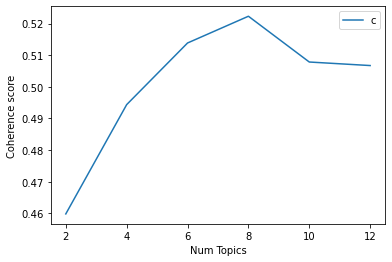

In [42]:
# Show graph
limit=14; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [43]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4598
Num Topics = 4  has Coherence Value of 0.4944
Num Topics = 6  has Coherence Value of 0.5139
Num Topics = 8  has Coherence Value of 0.5223
Num Topics = 10  has Coherence Value of 0.5078
Num Topics = 12  has Coherence Value of 0.5067


C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. So for further steps I will choose the model with 8 topics.

In [44]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.049*"charger" + 0.028*"battery" + 0.025*"problem" + 0.019*"time" + 0.018*"call" + 0.018*"option" + 0.017*"turbo" + 0.017*"box" + 0.017*"display" + 0.015*"hour"'), (1, '0.106*"quality" + 0.093*"camera" + 0.042*"price" + 0.031*"sound" + 0.030*"delivery" + 0.018*"battery" + 0.016*"everything" + 0.014*"speaker" + 0.014*"performance" + 0.013*"killer"'), (2, '0.079*"issue" + 0.042*"network" + 0.036*"problem" + 0.035*"amazon" + 0.034*"service" + 0.024*"call" + 0.021*"time" + 0.020*"month" + 0.019*"day" + 0.015*"customer"'), (3, '0.049*"money" + 0.030*"value" + 0.024*"heat" + 0.023*"camera" + 0.017*"speaker" + 0.017*"budget" + 0.015*"game" + 0.013*"day" + 0.013*"screen" + 0.011*"set"'), (4, '0.053*"camera" + 0.044*"quality" + 0.037*"waste" + 0.020*"battery" + 0.020*"range" + 0.019*"problem" + 0.019*"money" + 0.017*"picture" + 0.016*"model" + 0.015*"time"'), (5, '0.092*"problem" + 0.091*"battery" + 0.049*"heating" + 0.022*"charge" + 0.019*"drain" + 0.018*"time" + 0.015*"super" + 0.015*"

C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# Create the optimal topic model using LDA on the cleaned-up data with 6 topics (num_topics = 6)
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=47,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto") 

C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
lda_model_2.print_topics()

C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.049*"range" + 0.048*"processor" + 0.047*"software" + 0.043*"option" + 0.042*"charge" + 0.036*"music" + 0.032*"bit" + 0.026*"hr" + 0.026*"support" + 0.025*"stock"'),
 (1,
  '0.096*"day" + 0.058*"amazon" + 0.048*"service" + 0.048*"device" + 0.042*"heat" + 0.034*"life" + 0.029*"delivery" + 0.028*"lot" + 0.025*"usage" + 0.024*"customer"'),
 (2,
  '0.273*"problem" + 0.106*"money" + 0.039*"app" + 0.039*"turbo" + 0.035*"experience" + 0.023*"flash" + 0.016*"pic" + 0.014*"color" + 0.013*"ko" + 0.012*"auto"'),
 (3,
  '0.123*"time" + 0.069*"screen" + 0.053*"hour" + 0.029*"charging" + 0.026*"drain" + 0.025*"return" + 0.025*"ram" + 0.024*"glass" + 0.022*"card" + 0.019*"signal"'),
 (4,
  '0.182*"camera" + 0.157*"battery" + 0.072*"quality" + 0.047*"price" + 0.045*"performance" + 0.031*"heating" + 0.020*"mode" + 0.019*"display" + 0.018*"speaker" + 0.016*"waste"'),
 (5,
  '0.111*"backup" + 0.088*"charger" + 0.025*"hang" + 0.024*"killer" + 0.017*"today" + 0.016*"fast" + 0.013*"bill" + 0.013*"c

In [48]:
What is the coherence of the new optimal model?

coherence_model_lda_2 = CoherenceModel(model=optimal_model, texts=final_rev_words, dictionary=id2word, coherence='c_v')
coherence_lda_2 = coherence_model_lda_2.get_coherence()
print('\nCoherence Score: ', coherence_lda_2)

C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Object `model` not found.

Coherence Score:  0.5223144301233101


## Coherence of the new model is 0.52

In [49]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. Lower the better.


C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.933997204232882


In [50]:
# Visualize the topics using pyLDAvis for the optimal LDA model with num_topics = 4

vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, sort_topics = False)
pyLDAvis.display(vis)

C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# Top 4 terms for each topic.
topics_optimal_model=[]
topic_terms_optimal_model=[]
for i in range(4):
    topics_optimal_model.append("Topic "+ str(i+1))
    terms=[]
    for term in optimal_model.get_topic_terms(i,topn=10):
        terms.append(id2word[term[0]])
    topic_terms_optimal_model.append(terms)
    
for i in range(4):
    print(i,topic_terms_optimal_model[i])

0 ['charger', 'battery', 'problem', 'time', 'call', 'option', 'turbo', 'box', 'display', 'hour']
1 ['quality', 'camera', 'price', 'sound', 'delivery', 'battery', 'everything', 'speaker', 'performance', 'killer']
2 ['issue', 'network', 'problem', 'amazon', 'service', 'call', 'time', 'month', 'day', 'customer']
3 ['money', 'value', 'heat', 'camera', 'speaker', 'budget', 'game', 'day', 'screen', 'set']


C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df_topics_optimal_model = pd.DataFrame(topic_terms_optimal_model).transpose()
df_topics_optimal_model.columns=topics_optimal_model
df_topics_optimal_model

C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic 1,Topic 2,Topic 3,Topic 4
0,charger,quality,issue,money
1,battery,camera,network,value
2,problem,price,problem,heat
3,time,sound,amazon,camera
4,call,delivery,service,speaker
5,option,battery,call,budget
6,turbo,everything,time,game
7,box,speaker,month,day
8,display,performance,day,screen
9,hour,killer,customer,set


#### Task 11: The business should be able to interpret the topics.

    1. Name each of the identified topics.
    2. Create a table with the topic name and the top 10 terms in each to present to the business. Name each of the identified topics.


#### Based on the terms, the final topics could be categorised as follows:
    Topic 1 = Charger Problems
    Topic 2 = Performance and Quality
    Topic 3 = Customer Service Issues 
    Topic 4 = Financial

In [54]:
# 2.Create a table with the topic name and the top 10 terms in each to present to the  business.

topics_model2 = ["Charger Problems","Performance and Quality", "Customer Service Issues", "Financial"]
df_topics_optimal_model.columns=topics_model2
df_topics_optimal_model

C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Charger Problems,Performance and Quality,Customer Service Issues,Financial
0,charger,quality,issue,money
1,battery,camera,network,value
2,problem,price,problem,heat
3,time,sound,amazon,camera
4,call,delivery,service,speaker
5,option,battery,call,budget
6,turbo,everything,time,game
7,box,speaker,month,day
8,display,performance,day,screen
9,hour,killer,customer,set


In [55]:
df_topics_optimal_model.to_csv("Topic Model Reviews for K8.csv")

C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Byju\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


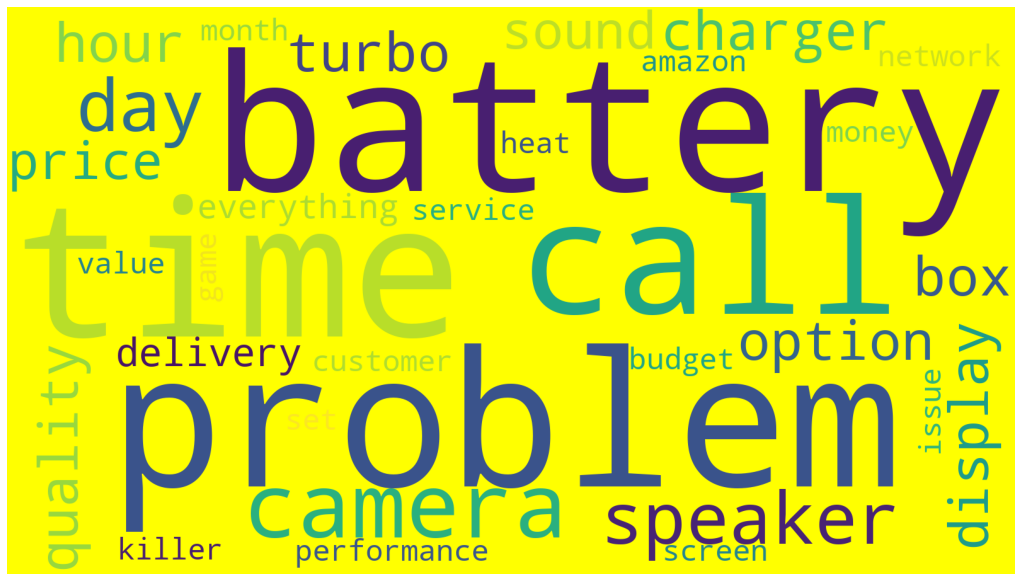

In [56]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
topic_words = " "
stopwords = set(STOPWORDS)
tokens=[]
for topic in topic_terms_optimal_model:
    for word in topic:
        tokens.append(word)

topic_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1600, height = 900,
                background_color ='yellow',
                stopwords = stopwords,
                min_font_size = 10, max_font_size=300).generate(topic_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (14, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()